In [2]:
import pandas as pd
import sys
# Path to the directory just above 'Code'
sys.path.append('/Users/maxguo/Desktop/TS_Forecasting_Project/TS_Forecasting_Project')
from Code.Load import Loaded_Data as ld
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = ld.combined_data

In [4]:
df = df.dropna()
df

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index
date,,,,,,,,,,,,,,,
2018-03-31,394716,227,"Jacksonville, NC",msa,South,NC,1539.0,1.929569e+05,56.0,5094.944958,0.027561,143500.0,0.266526,154459.528570,823.322011
2018-03-31,753899,2,"Los Angeles, CA",msa,West,CA,21998.0,1.380173e+06,35.0,44820.203428,0.031670,608333.0,0.400035,642150.555974,2200.105664
2018-03-31,394623,226,"Gainesville, GA",msa,South,GA,933.0,2.707985e+05,48.0,11497.960338,0.031285,192008.0,0.128427,211786.882602,1143.336684
2018-03-31,394765,218,"Lake Havasu City, AZ",msa,West,AZ,2235.0,2.391947e+05,59.0,8499.731706,0.033192,173667.0,0.090133,203204.620450,963.200823
2018-03-31,394380,232,"Bend, OR",msa,West,OR,1682.0,3.683550e+05,52.0,16474.326599,0.029649,370733.0,0.200968,399533.774419,1441.866819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,394355,29,"Austin, TX",msa,South,TX,9074.0,5.149174e+05,87.0,23326.246893,0.031354,443750.0,0.116435,466361.037157,1757.910625
2024-02-29,394531,84,"Des Moines, IA",msa,Midwest,IA,1967.0,4.047605e+05,55.0,9217.074442,0.027681,241333.0,0.163873,276637.697663,1234.399662
2024-02-29,394901,147,"Naples, FL",msa,South,FL,5933.0,1.846364e+06,70.0,50895.654309,0.037867,594833.0,0.046059,620144.946021,2895.976153


In [5]:
# # Export DataFrame to CSV
# df.to_csv('output.csv', index=True)

In [6]:
df.reset_index(inplace=True)

/var/folders/n4/gxgjq2d52n1gzz_0x_mtj72r0000gn/T/ipykernel_72760/2232789795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


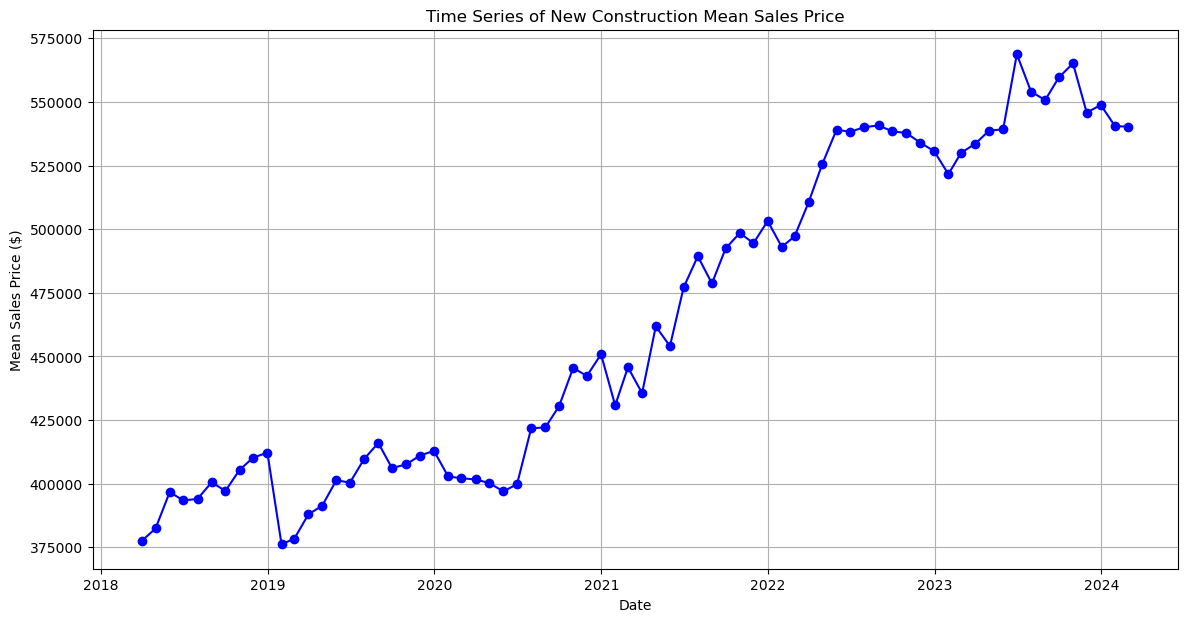

In [7]:
# Convert date to datetime format for better handling
df['date'] = pd.to_datetime(df['date'])

# Group data by date and compute the mean of new construction mean sales price
time_series_data = df.groupby('date')['new construction mean sales price ($)'].mean()

# Plotting the time series of mean sales price
plt.figure(figsize=(14, 7))
plt.plot(time_series_data, marker='o', linestyle='-', color='b')
plt.title('Time Series of New Construction Mean Sales Price')
plt.xlabel('Date')
plt.ylabel('Mean Sales Price ($)')
plt.grid(True)
plt.show()


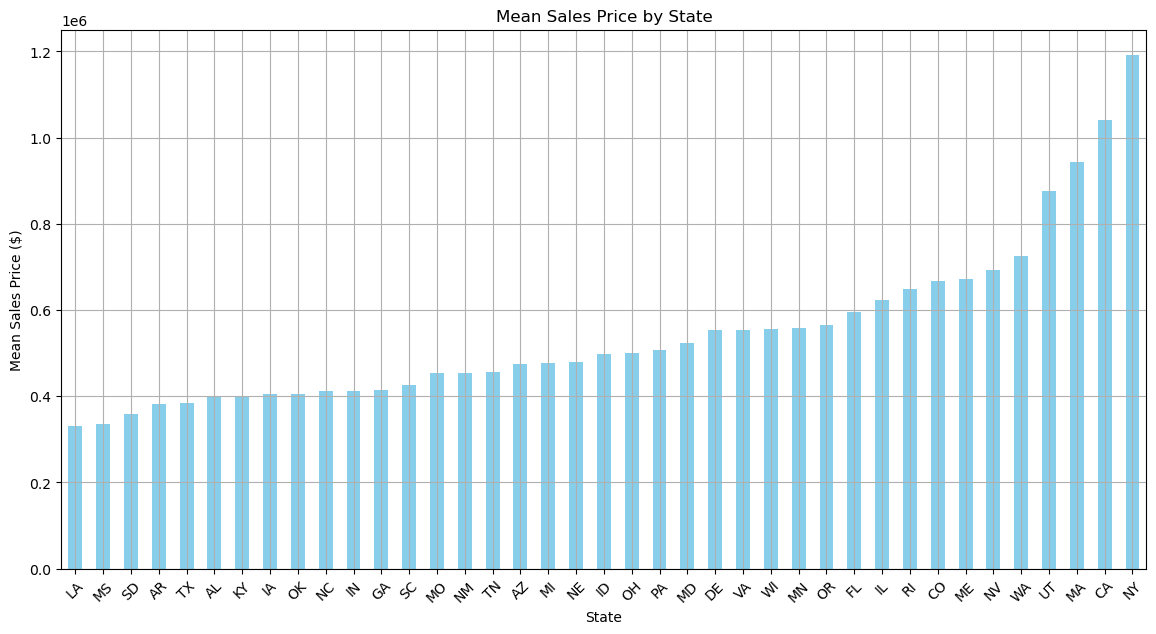

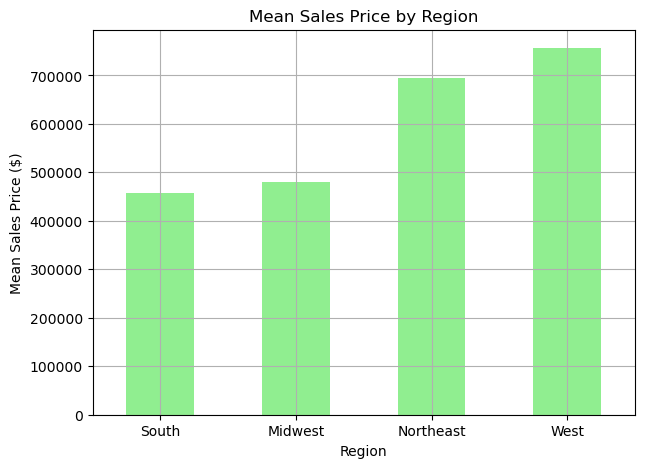

In [8]:
# Filtering data for the most recent date available
latest_data = df[df['date'] == df['date'].max()]

# Group data by state and compute the mean of new construction mean sales price
state_data = latest_data.groupby('statename')['new construction mean sales price ($)'].mean()

# Group data by region and compute the mean of new construction mean sales price
region_data = latest_data.groupby('region')['new construction mean sales price ($)'].mean()

# Plotting mean sales price by state
plt.figure(figsize=(14, 7))
state_data.sort_values().plot(kind='bar', color='skyblue')
plt.title('Mean Sales Price by State')
plt.xlabel('State')
plt.ylabel('Mean Sales Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting mean sales price by region
plt.figure(figsize=(7, 5))
region_data.sort_values().plot(kind='bar', color='lightgreen')
plt.title('Mean Sales Price by Region')
plt.xlabel('Region')
plt.ylabel('Mean Sales Price ($)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


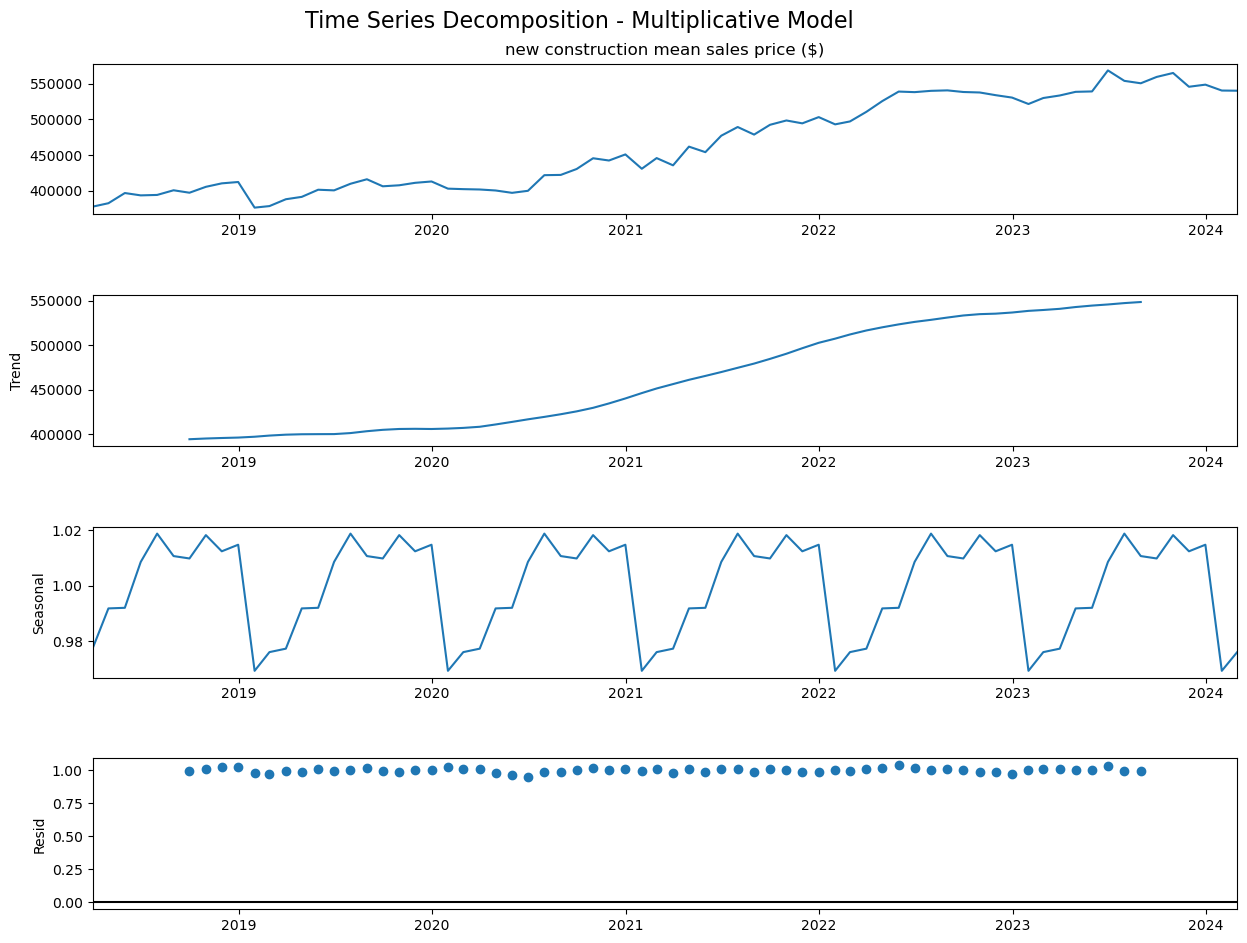

In [11]:
# Decomposing the full time series using a multiplicative model
full_decomposition = seasonal_decompose(time_series_data, model='multiplicative', period=12)

# Plotting the decomposed components
fig_full = full_decomposition.plot()
fig_full.set_size_inches(14, 10)
fig_full.suptitle('Time Series Decomposition - Multiplicative Model', fontsize=16)
plt.show()


## Old Code

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['median sales price ($)'])

adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Number of Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4]
}

adf_result


{'ADF Statistic': -12.317363962499417,
 'p-value': 6.873441315966451e-23,
 'Number of Lags Used': 42,
 'Number of Observations Used': 18646,
 'Critical Values': {'1%': -3.4307007562198417,
  '5%': -2.861695021301512,
  '10%': -2.5668525137106584}}

In [8]:
from pmdarima import auto_arima

# Automatically fitting the best ARIMA model
auto_arima_model = auto_arima(df['median sales price ($)'], 
                              seasonal=False,  # No seasonal component as we assume seasonality was part of initial decompose
                              trace=True, 
                              error_action='ignore', 
                              suppress_warnings=True)

# Best ARIMA model summary
auto_arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=512769.422, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=507701.619, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=512767.422, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=505600.072, Time=0.83 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=504460.523, Time=1.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=503767.294, Time=1.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=503250.108, Time=1.59 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=15.09 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=503248.109, Time=1.45 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=503765.294, Time=1.23 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=9.45 sec
 ARIMA(4,1,1)(0,0,0)[0]             : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                18689
Model:               SARIMAX(5, 1, 0)   Log Likelihood             -251618.055
Date:                Fri, 03 May 2024   AIC                         503248.109
Time:                        17:12:58   BIC                         503295.123
Sample:                             0   HQIC                        503263.541
                              - 18689                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8041      0.007   -120.775      0.000      -0.817      -0.791
ar.L2         -0.6394      0.008    -76.765      0.000      -0.656      -0.623
ar.L3         -0.4776      0.009    -53.071      0.000      -0.495      -0.460
ar.L4         -0.3191      0.008    -38.775      0.000      -0.335      -0.303
ar.L5         -0.1656      0.006    -26.599      0.000      -0.178      -0.153
sigma2        2.9e+10   1.13e-13   2.58e+23      0.000     2.9e+10     2.9e+10
===================================================================================
Ljung-Box (L1) (Q):                  10.87   Jarque-Bera (JB):             54949.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.11e+37. Standard errors may be unstable.
"""

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting an ARIMA(5,1,0) model based on the user's local analysis
arima_model_510 = ARIMA(df['median sales price ($)'], order=(5,1,0))
arima_result_510 = arima_model_510.fit()

# Summary of the ARIMA model
arima_result_510.summary()


/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     median sales price ($)   No. Observations:                18689
Model:                     ARIMA(5, 1, 0)   Log Likelihood             -251618.055
Date:                    Fri, 03 May 2024   AIC                         503248.109
Time:                            17:13:00   BIC                         503295.123
Sample:                                 0   HQIC                        503263.541
                                  - 18689                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8041      0.007   -120.775      0.000      -0.817      -0.791
ar.L2         -0.6394      0.008    -76.765      0.000      -0.656      -0.623
ar.L3         -0.4776      0.009    -53.071      0.000      -0.495      -0.460
ar.L4         -0.3191      0.008    -38.775      0.000      -0.335      -0.303
ar.L5         -0.1656      0.006    -26.599      0.000      -0.178      -0.153
sigma2        2.9e+10   1.13e-13   2.58e+23      0.000     2.9e+10     2.9e+10
===================================================================================
Ljung-Box (L1) (Q):                  10.87   Jarque-Bera (JB):             54949.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.11e+37. Standard errors may be unstable.
"""

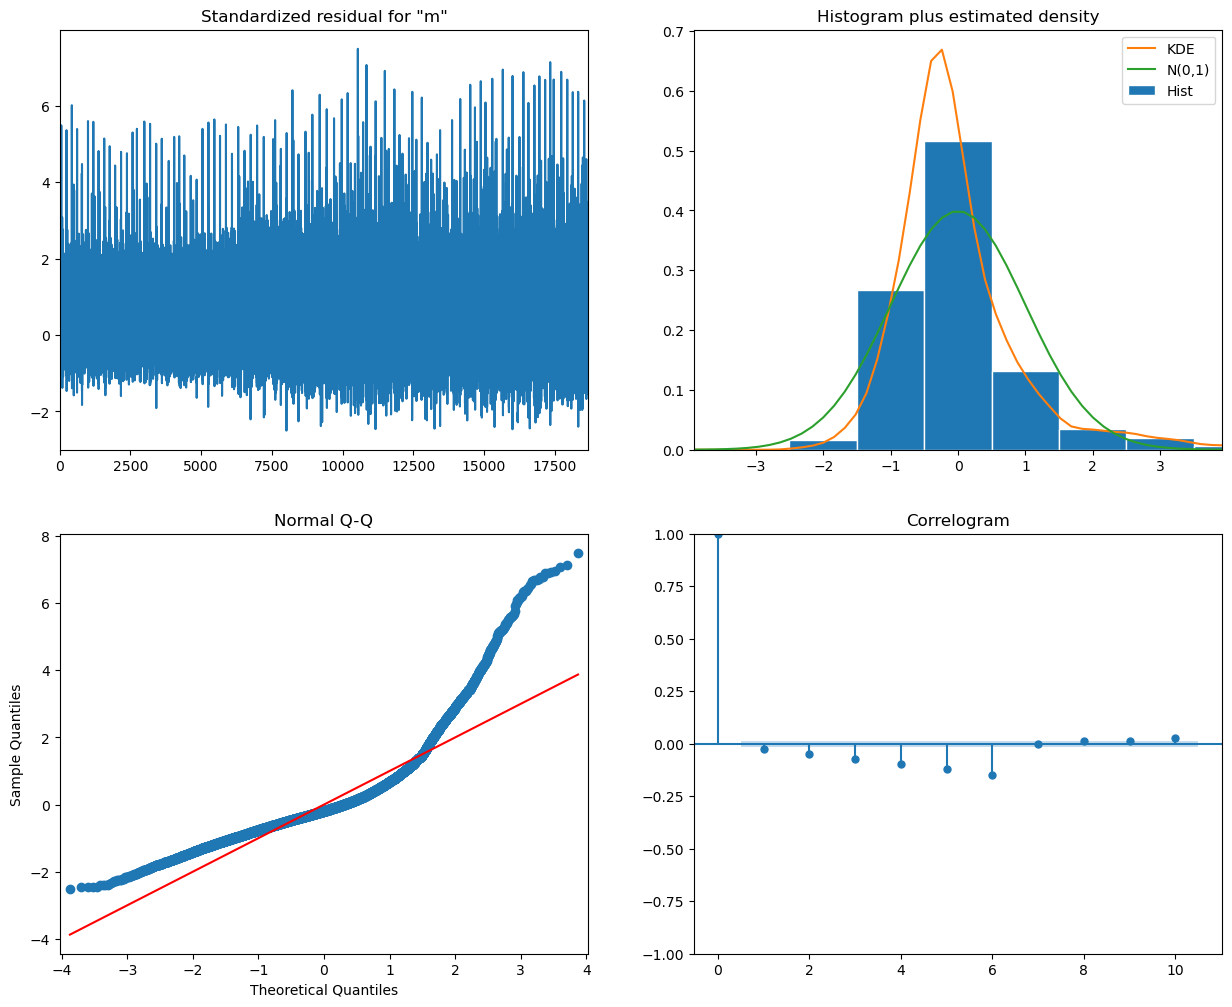

In [11]:
# Plot diagnostics
arima_result_510.plot_diagnostics(figsize=(15, 12))
plt.show()

/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index begin

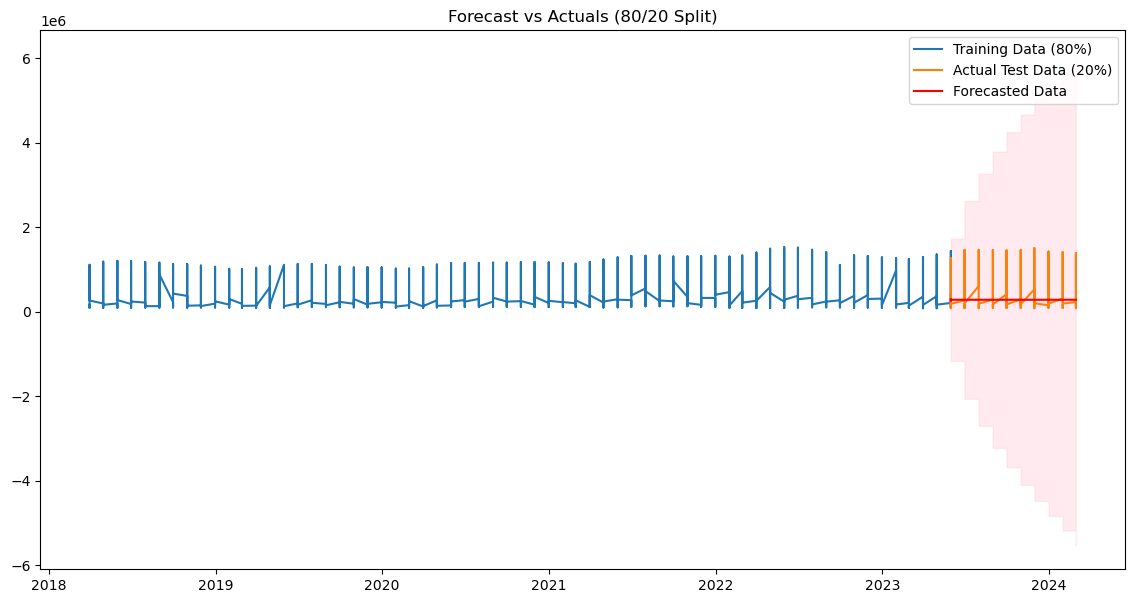

RMSE: 185238.26502196354


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

median_sales_price = df['median sales price ($)']


# Calculate the index for an 80/20 split
split_idx = int(len(median_sales_price) * 0.8)

# Define the training and test sets based on 80/20 split
train = median_sales_price[:split_idx]
test = median_sales_price[split_idx:]

# Fit the ARIMA(5,1,0) model on the 80% training data
model = ARIMA(train, order=(5,1,0))
fitted_model = model.fit()

# Forecast for the length of the test set
forecast_result = fitted_model.get_forecast(steps=len(test))
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Calculate RMSE for the 80/20 split model
rmse = sqrt(mean_squared_error(test, forecast_mean))

# Plotting the results for 80/20 split
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data (80%)')
plt.plot(test.index, test, label='Actual Test Data (20%)')
plt.plot(test.index, forecast_mean, label='Forecasted Data', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals (80/20 Split)')
plt.legend()
plt.show()

print('RMSE:', rmse)


/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/maxguo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


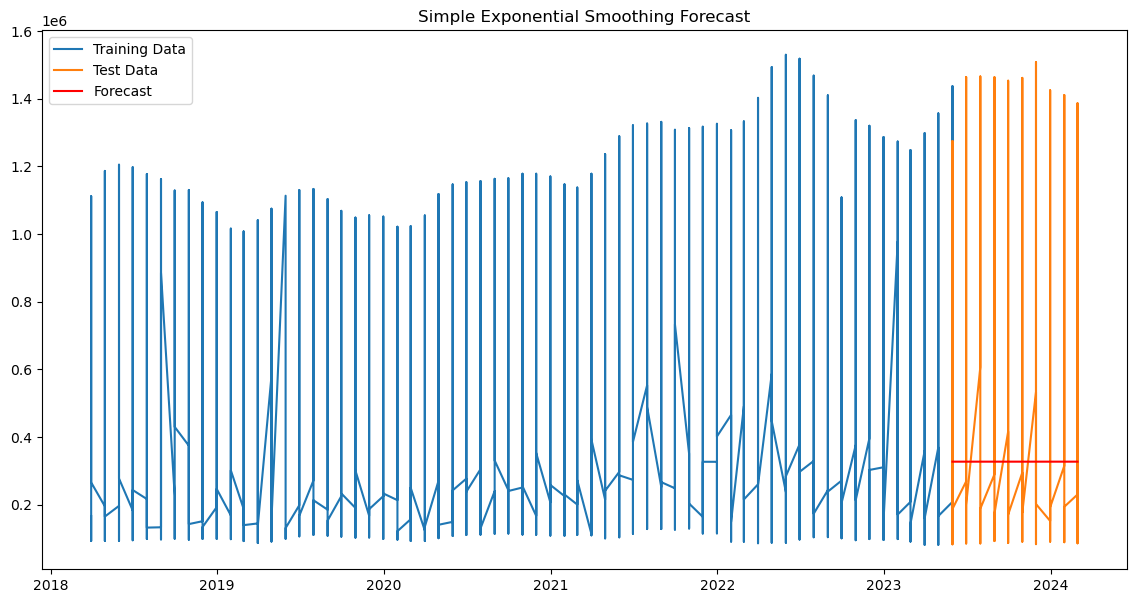

RMSE: 180529.614169209


In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the complete data for fitting
data_full = df['median sales price ($)']

# Calculate the split index
split_index = int(len(data_full) * 0.8)

# Split the data into training and testing
train_data = data_full[:split_index]
test_data = data_full[split_index:]

# Fit Simple Exponential Smoothing on training data
ses_model = SimpleExpSmoothing(train_data).fit()

# Forecast for the length of the test data
ses_forecast = ses_model.forecast(len(test_data))

# Calculate RMSE for the forecast
rmse = sqrt(mean_squared_error(test_data, ses_forecast))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, ses_forecast, label='Forecast', color='red')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()

print('RMSE:', rmse)
